In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/

file_path = "/content/drive/My Drive/Colab Notebooks/master_RMS.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Ensure correct column selection (features = columns 2-9, target = column 10)
feature_columns = df.columns[1:9]  # Select only EMG channel data (columns 2-9)
target_column = df.columns[9]  # Column 10 (class label)

NEXT CODE BLOCK SUPER IMPORTANT. IGNORE DATA CLASSED AS ZERO.

In [ ]:
# **Filter out rows where class == 0**
df = df[df[target_column] != 0]
df = df[df[target_column] != 7]

# Convert target column to categorical type (ensures proper color mapping)
df[target_column] = df[target_column].astype(str)  # Convert to string for discrete categories

In [ ]:
df.head()

,instance,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
1,2,0.000019,0.000021,0.000021,0.000020,0.000020,0.000042,0.000025,0.000022,1.0
3,4,0.000783,0.000446,0.000142,0.000324,0.000355,0.000269,0.000329,0.000439,2.0
5,6,0.000122,0.000334,0.000099,0.000046,0.000222,0.000243,0.000081,0.000184,3.0
7,8,0.000081,0.000059,0.000099,0.000215,0.000666,0.000646,0.000219,0.000149,4.0
9,10,0.000025,0.000090,0.000028,0.000090,0.000425,0.000191,0.000074,0.000032,5.0


In [ ]:
# Standardize data for t-SNE (helps with performance & accuracy)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

In [ ]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to DataFrame
df["tSNE-1"] = X_tsne[:, 0]
df["tSNE-2"] = X_tsne[:, 1]

<ipython-input-8-1d113a7b42fd>:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x="tSNE-1", y="tSNE-2", hue=df[target_column], palette=palette, data=df, alpha=0.8, edgecolor="black")


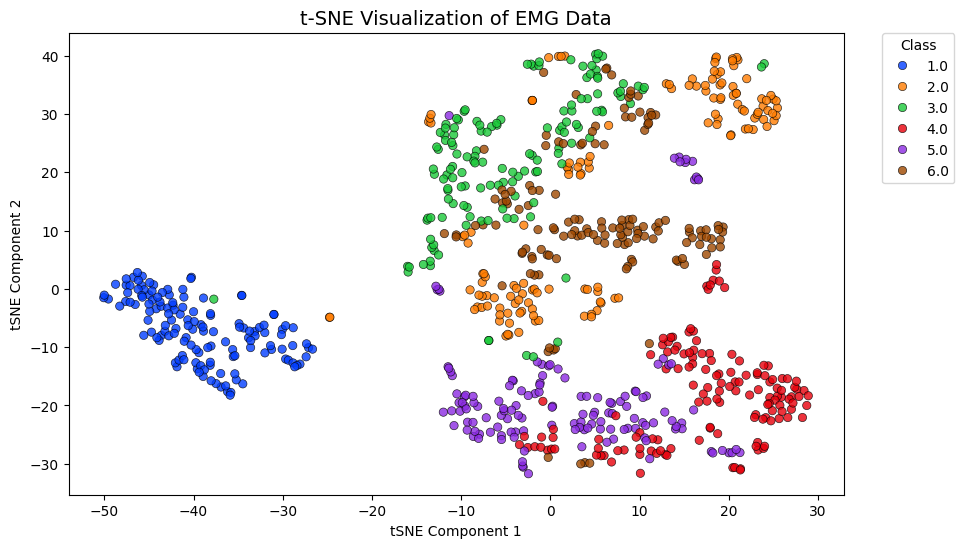

In [ ]:
# Define a high-contrast color palette (e.g., 'tab10' or 'Set1' for categorical data)
palette = sns.color_palette("bright", n_colors=8)  # 8 distinct colors

# Plot t-SNE visualization with improved legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE-1", y="tSNE-2", hue=df[target_column], palette=palette, data=df, alpha=0.8, edgecolor="black")

# Improve plot appearance
plt.title("t-SNE Visualization of EMG Data", fontsize=14)
plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

# Improve legend placement
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

# Show plot
plt.show()

In [ ]:
X = df[feature_columns].values
y = df[target_column].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize features again (ensure same scaling as t-SNE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)

# Predict
y_pred = svm.predict(X_test_scaled)

Accuracy: 0.9107142857142857

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        28
         2.0       0.93      0.93      0.93        28
         3.0       0.85      0.82      0.84        28
         4.0       1.00      0.89      0.94        28
         5.0       0.87      0.93      0.90        28
         6.0       0.86      0.89      0.88        28

    accuracy                           0.91       168
   macro avg       0.91      0.91      0.91       168
weighted avg       0.91      0.91      0.91       168



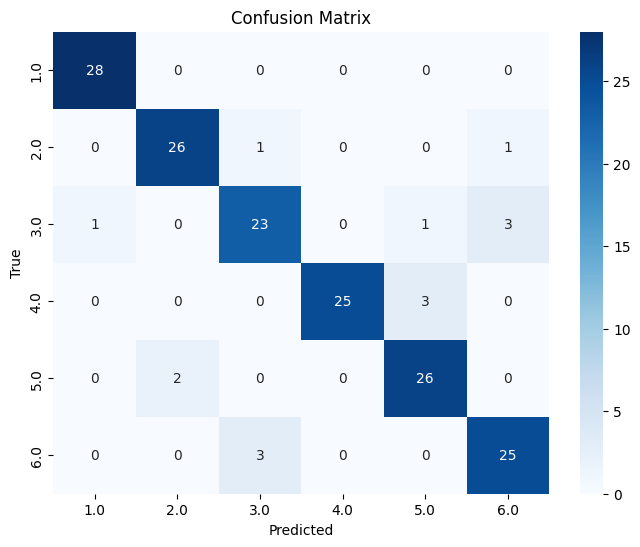

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

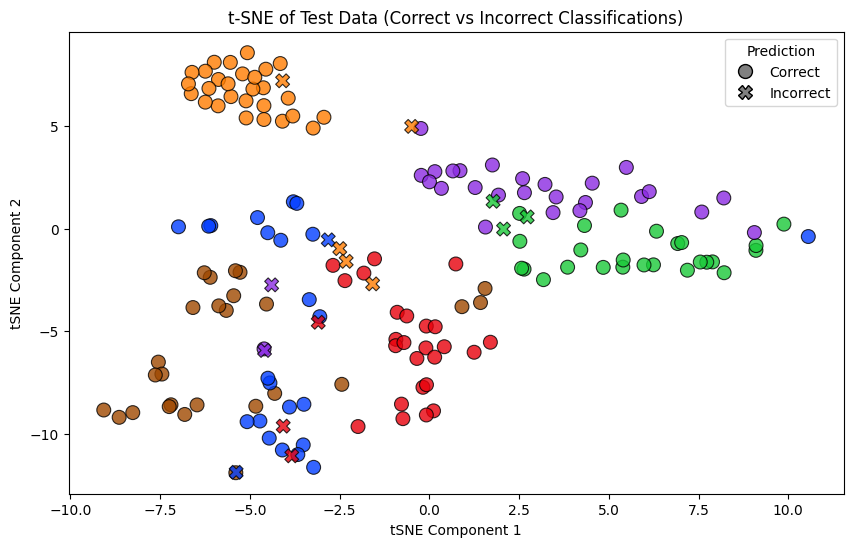

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a DataFrame for the test set (after classification)
df_test = pd.DataFrame(X_test_scaled, columns=feature_columns)
df_test["TrueLabel"] = y_test
df_test["PredictedLabel"] = y_pred
df_test["Correct"] = df_test["TrueLabel"] == df_test["PredictedLabel"]

# Apply t-SNE to the test set only
tsne_test = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne_test = tsne_test.fit_transform(X_test_scaled)
df_test["tSNE-1"] = X_tsne_test[:, 0]
df_test["tSNE-2"] = X_tsne_test[:, 1]

# Plot: color = true class, marker = correctness
plt.figure(figsize=(10, 6))
for correct in [True, False]:
    marker = "o" if correct else "X"
    subset = df_test[df_test["Correct"] == correct]
    sns.scatterplot(
        x="tSNE-1",
        y="tSNE-2",
        hue="TrueLabel",
        data=subset,
        style="Correct",  # Just to force different marker shapes
        markers=[marker],
        palette="bright",
        alpha=0.8,
        edgecolor="black",
        legend=False,
        s=100
    )

# Add legend manually for marker shape
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='gray', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='X', color='w', label='Incorrect', markerfacecolor='gray', markersize=10, markeredgecolor='black'),
]
plt.legend(handles=legend_elements, title='Prediction')

plt.title("t-SNE of Test Data (Correct vs Incorrect Classifications)")
plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")
plt.show()
